Offline steps:

1. Combine scraped files
2. Use Notepad++ to convert encoding to UTF8
3. sort out carriage returns etc.
4. End up with rawest_just_eat.csv 

Long story:
1. Get raw scraped files
2. Open them in Notepad++ and choose Encode in UTF8
3. This didn't work for #7 which had to be saved as unicode text and then saved as UTF 8
4. Then knit them together in Python


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [37]:
je = pd.read_csv('/home/trpb2/data/takeaway/rawest_just_eat.csv')

In [38]:
my_dir = '/home/trpb2/takeaways/data/scraped/'

In [39]:
je_temp = pd.concat([pd.read_csv(my_dir+f) for f in os.listdir(my_dir)], ignore_index = True)

In [40]:
je = je_temp[['Name','Cuisines']]

In [41]:
je = pd.concat([je['Name'], je['Cuisines'].str.split(', ', expand=True)], axis=1)

In [42]:
je.columns = ['text','label','label2','label3']

In [43]:
je[je.label2.isna()]

,text,label,label2,label3
2,KFC Derby - Westfield Centre,Chicken,None,None
17,Bucky's Restaurant,African,None,None
26,KFC Barnsley Peel Street,Chicken,None,None
27,The Balti,Indian,None,None
31,Chiquito - Nottingham Cornerhouse,Mexican,None,None
43,Chiquito - Trowbridge,Tex Mex,None,None
44,KFC Cippenham,Chicken,None,None
52,Birdbox - Edinburgh The Gyle,Chicken,None,None
59,Cheung Sing,Chinese,None,None
64,Abertillery Kebab House,Kebab,None,None


In [44]:
je.dropna(thresh=3, inplace=True)

In [45]:
je['text'] = je.text.str.lower()

In [46]:
deliv = pd.read_csv('/home/trpb2/data/takeaway/deliveroo_full_scrape_combined_12.04.2020.csv')

In [47]:
cols = [0,1,6,7,8,9,10,11,12]
deliv.drop(deliv.columns[cols], axis=1,inplace=True)

In [48]:
deliv.columns = ['text','label','label2','label3']

In [49]:
deliv['text'] = deliv.text.str.lower()

In [50]:
deliv = deliv[deliv['text'].notna()]

In [73]:
df = pd.concat([je, deliv], ignore_index=True)

## Character Set

What letters outside of ASCII are in the names?


In [74]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 143302),
 ("'", 81943),
 (',', 43252),
 ('-', 14291),
 ('"', 8795),
 ('&', 3757),
 ('®', 579),
 ('(', 556),
 (')', 555),
 ('2', 374),
 ('’', 373),
 ('1', 364),
 ('.', 295),
 ('@', 227),
 ('4', 216),
 ('0', 189),
 ('3', 166),
 ('8', 119),
 ('7', 115),
 ('9', 110),
 ('5', 109),
 ('6', 108),
 ('\\', 100),
 ('!', 96),
 ('/', 78),
 ('é', 64),
 ('`', 24),
 ('+', 21),
 ('´', 19),
 ('–', 11),
 ('城', 11),
 ('味', 10),
 ('‘', 9),
 (':', 9),
 ('食', 9),
 ('#', 8),
 ('美', 8),
 ('小', 8),
 ('ä', 6),
 ('è', 6),
 ('中', 6),
 ('大', 6),
 ('菜', 6),
 ('馆', 6),
 ('面', 6),
 ('米', 6),
 ('*', 5),
 ('ö', 5),
 ('?', 5),
 ('老', 5),
 ('餐', 5),
 ('香', 5),
 ('🍣', 5),
 ('⚡', 4),
 ('茶', 4),
 ('国', 4),
 ('酒', 4),
 ('家', 4),
 ('豪', 4),
 ('轩', 4),
 ('好', 4),
 ('辣', 4),
 ('ï', 4),
 ('🌶', 4),
 ('🏄', 4),
 ('ê', 3),
 ('南', 3),
 ('东', 3),
 ('太', 3),
 ('華', 3),
 ('館', 3),
 ('🐓', 3),
 ('临', 3),
 ('樓', 3),
 ('友', 3),
 ('帝', 3),
 ('吃', 3),
 ('皇', 3),
 ('羊', 3),
 ('宫', 3),
 ('🇯', 3),
 ('🇵', 3),
 ('西', 3),
 ('安', 3),
 ('记', 3)

In [75]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,text,label,label2,label3,ascii_name
56,subway® - 7 wellmeadow street,Sandwiches,Lunch,Halal,subway(r) - 7 wellmeadow street
93,café bagel,Bagels,Vegan,None,cafe bagel
99,ollie’s kebab ye / fish&chips,Kebab,Fish & Chips,None,ollie's kebab ye / fish&chips
110,subway® gravesend high street,Subways,Sandwiches,None,subway(r) gravesend high street
118,hennie penny’s chicken,Chicken,American,None,hennie penny's chicken
192,subway® - london road,Sandwiches,Halal,None,subway(r) - london road
214,subway® - charon way,Sandwiches,Lunch,None,subway(r) - charon way
299,subway® wakefield drive thru,Subways,Sandwiches,None,subway(r) wakefield drive thru
346,subway® - coventry high street,Sandwiches,Lunch,None,subway(r) - coventry high street
350,subway®- 9/11 high street,Sandwiches,Lunch,None,subway(r)- 9/11 high street


In [76]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 143734),
 ("'", 81576),
 (',', 43252),
 ('-', 14302),
 ('"', 9563),
 ('&', 3757),
 ('(', 1136),
 (')', 1135),
 ('2', 374),
 ('1', 364),
 ('.', 295),
 ('@', 227),
 ('4', 216),
 ('0', 188),
 ('3', 166),
 ('8', 119),
 ('7', 115),
 ('9', 110),
 ('5', 109),
 ('6', 108),
 ('\\', 97),
 ('!', 96),
 ('/', 78),
 ('`', 24),
 ('+', 21),
 (':', 9),
 ('?', 9),
 ('#', 8),
 ('[', 5),
 ('*', 5),
 (']', 5),
 ('%', 2),
 ('~', 2),
 ('_', 1),
 ('|', 1)]

In [81]:
df[df.text.str.contains('`')]

,text,label,label2,label3,ascii_name,ascii_name_fix
229,tim`s chipper,Fish & Chips,Kebab,None,tim`s chipper,tim`s chipper
2635,tk`s pizza,Pizza,Italian,Halal,tk`s pizza,tk`s pizza
3856,valentino`s pizzas,Italian,Pizza,None,valentino`s pizzas,valentino`s pizzas
7009,st andrew`s takeaway,Fish & Chips,Pizza,None,st andrew`s takeaway,st andrew`s takeaway
12344,pepe`s,Pizza,Burgers,None,pepe`s,pepe`s
13671,sauro`s chippy,Fish & Chips,Burgers,None,sauro`s chippy,sauro`s chippy
15367,tj`s chicken xpress,Chicken,Burgers,None,tj`s chicken xpress,tj`s chicken xpress
15543,smithy`s fish & chips,Fish & Chips,Pizza,None,smithy`s fish & chips,smithy`s fish and chips
17267,cafe de nero`s,Italian,Pizza,None,cafe de nero`s,cafe de nero`s
17270,riccardo`s pizzeria,Kebab,Pizza,None,riccardo`s pizzeria,riccardo`s pizzeria


In [82]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name.str.replace("'","")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('&'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%','&']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,text,label,label2,label3,ascii_name,ascii_name_fix
229,tim`s chipper,Fish & Chips,Kebab,None,tim`s chipper,tim`s chipper
2635,tk`s pizza,Pizza,Italian,Halal,tk`s pizza,tk`s pizza
3856,valentino`s pizzas,Italian,Pizza,None,valentino`s pizzas,valentino`s pizzas
7009,st andrew`s takeaway,Fish & Chips,Pizza,None,st andrew`s takeaway,st andrew`s takeaway
12344,pepe`s,Pizza,Burgers,None,pepe`s,pepe`s
13671,sauro`s chippy,Fish & Chips,Burgers,None,sauro`s chippy,sauro`s chippy
15367,tj`s chicken xpress,Chicken,Burgers,None,tj`s chicken xpress,tj`s chicken xpress
15543,smithy`s fish & chips,Fish & Chips,Pizza,None,smithy`s fish & chips,smithy`s fish and chips
17267,cafe de nero`s,Italian,Pizza,None,cafe de nero`s,cafe de nero`s
17270,riccardo`s pizzeria,Kebab,Pizza,None,riccardo`s pizzeria,riccardo`s pizzeria


In [71]:
df = df.drop(columns=['text', 'ascii_name'])

In [57]:
df

,label,label2,label3,ascii_name_fix
0,Chicken,Pizza,Halal,southern fried chicken and pizza
1,Pizza,Salads,None,pizza hut delivery - cambuslang
2,Indian,Bangladeshi,Halal,the curry garden
3,Kebab,Turkish,None,j and d kebab
4,Chicken,Peri Peri,None,pepes piri piri
5,Indian,Curry,None,maharani indian cuisine
6,Caribbean,Fast Food,None,sweet jamrock
7,Indian,Curry,None,zaafran
8,Kebab,Indian,Halal,omar sharifs
9,Pizza,Chicken,None,pizza home


## Get rid of some key chains
we just take their most common tag in each column

In [24]:
hard_coded_chains = ["asda kitchen", "basilico", "bella italia", "birdbox", "blazing bird", "burger king", "caspian pizza", "chicken cottage", "chiquito", "firezza", "frankie & benny's", "gbk", "greggs", "harvester", "itsu", "kfc", "kick ass", "las iguanas", "papa john", "pizza hut", "stack & grill", "stacks", "subway", "tim horton", "toby carvery", "tortilla -", "turtle bay", "wimpy", "yo!"]
for chain in hard_coded_chains:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            #to_append[l] = np.nan
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

In [26]:
df['trim'] = df['ascii_name_fix'].str.split(r' - ').str.get(0)
df['trim2'] = df['ascii_name_fix'].str.split(" \(").str.get(0)

In [29]:
#suspected chains are those that have a - or (
# then test the split name with the full name, if they are not equal then they had a - or ()
sus_chains = df[(df['trim']!=df['ascii_name_fix'])|(df['trim2']!=df['ascii_name_fix'])]
print([sus_chains[col].str.len().min() for col in ['trim','trim2']])


[2, 3]


In [31]:
sus_chains = df[(df['trim']!=df['ascii_name_fix'])]['trim'].to_list()
sus_chains2 = df[(df['trim2']!=df['ascii_name_fix'])]['trim2'].to_list()
sus_chains_list = sus_chains + sus_chains2
len(sus_chains)

11122

In [32]:
my_count = Counter(sus_chains_list)
counts = pd.DataFrame(my_count.most_common(), columns=['ascii_name_fix', 'count'])

In [33]:
# we probably just want the ones where they occur more than once. Otherwise we get places like
# pizza - the finest which is not a chain
counts[counts['count']>1]

,ascii_name_fix,count
0,co-op,265
1,frankie and benny's,79
2,shell,58
3,roosters piri piri,51
4,morrisons,50
5,creams,48
6,dixy chicken,47
7,wenzel's,46
8,tops pizza,42
9,harry ramsden,41


In [34]:
# leave at 10 to catch chains not duplicates - need to review by eye
# chain_dupe1 = name_classes1.loc[name_classes1['count']> 10,['trim']].trim.to_list()
# chain_dupe2 = name_classes2.loc[name_classes2['count']> 10,['trim2']].trim2.to_list()
# to_trim_down = list(set().union(chain_dupe1,chain_dupe2))
to_trim_down = counts.loc[counts['count']> 1,['ascii_name_fix']].ascii_name_fix.to_list()

In [35]:
to_trim_down

['co-op',
 "frankie  and  benny's",
 'shell',
 'roosters piri piri',
 'morrisons',
 'creams',
 'dixy chicken',
 "wenzel's",
 'tops pizza',
 'harry ramsden',
 'favorite chicken  and  ribs',
 "kaspa's",
 "pepe's piri piri",
 'support the nhs',
 'german doner kebab',
 'the ice cream store',
 'pieminister',
 'the ice cream hub',
 'joe  and  the juice',
 'cluxxx it',
 "sam's chicken",
 'stack  and  grill by cafe rouge',
 'majestic wine',
 "big john's",
 "mccoll's ",
 'little dessert shop',
 'bang bang burrito',
 'kokoro',
 'mac shack',
 "pepe's piri piri ",
 'shell ',
 'off licence',
 'wok  and  go',
 'ice cream store',
 "wenzel's ",
 'chopstix noodle bar',
 'heavenly desserts',
 'co-op ',
 'morrisons ',
 'nisa local',
 'coast to coast',
 'oodles chinese',
 'five guys',
 'leon',
 'shell select',
 'fireaway',
 'pleesecakes',
 'the drinks factory',
 'chop  and  wok',
 "morley's",
 'roosters piri piri ',
 "rosa's thai cafe",
 "nando's",
 'amorino',
 'chabad',
 'delightful desserts',
 'holy cow

In [36]:
for chain in to_trim_down:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

/home/trpb2/.conda/envs/fastai_v1/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [36]:
df = df.drop(columns=['trim', 'trim2', 'label3'])

In [37]:
df[df.ascii_name_fix.str.contains("mamas", regex= True, na=False)]

,label,label2,ascii_name_fix
2746,Parmesans,Kebab,mamas pizza
3119,Parmesans,Kebab,mamas pizzeria
6162,Burgers,Pizza,big mamas
12088,Burgers,Desserts,mamas
21089,American,Pizza,big mamas pizza and grill - broad green
23735,Chicken,Caribbean,mamas jerk - hackney
23736,Burgers,Jamaican,mamas jerk - deptford
23740,African,Caribbean,mamasaaga kitchen - chelmsford


## Check for duplicates


These are remaining duplicates with different classes

In [38]:
name_classes = df.\
  groupby('ascii_name_fix').size().reset_index(name='counts')

Use similar logic to removing chains to take the most popular labels

In [39]:
to_dedupe = name_classes[name_classes['counts'] > 1]['ascii_name_fix'].to_list()

In [40]:
to_dedupe

['10 to 10 in delhi',
 '1st class pizza',
 '2-4-1 pizza',
 '241 pizza',
 '7 spices',
 'a mano',
 'a touch of spice',
 "a'la pizza  and  grill",
 'abbey fish bar',
 'abduls',
 'aburi japanese restaurant',
 'acropolis',
 "adam's pizza",
 "adam's pizzeria",
 'adams',
 'agra',
 'ahi poke',
 'akash',
 'akash restaurant',
 'akash tandoori',
 'akash tandoori restaurant',
 'american fried chicken',
 'amigo',
 'amigo pizza',
 "amigo's",
 "amigo's pizza",
 'amigos',
 'amigos pizza',
 'amore pizza',
 'amran tandoori',
 "andy's greek taverna",
 "angelo's fish bar",
 'anglo pizza',
 'anise',
 'anoki',
 'antep pizza',
 'antonios pizza',
 'apadana',
 'apna lahore',
 'ariana restaurant',
 'asha',
 'ashiana',
 'asia villa',
 'asian tandoori',
 'asiana',
 'athena',
 'atlantic fish bar',
 'atlantis fish bar',
 'authentic chinese',
 'av-a-pizza',
 'avon spice',
 'aya lebanese cuisine',
 'aziz khan',
 'baan thai',
 'baburchi',
 'babylon',
 'babylon grill',
 'bad boy burgers',
 'bagel bite',
 'baguette expr

In [41]:
for chain in to_dedupe:
    to_drop = df[df['ascii_name_fix'] == chain]
    df = df[df['ascii_name_fix'] != chain]
    to_append = {'ascii_name_fix' : chain}
    labels = ['label','label2']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = None
    df = df.append(to_append, ignore_index=True)

In [42]:
df[['label','label2']] = df[['label','label2']].astype(str)

check for duplicate name label combinations

In [43]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label', 'label2']).count().sort_values('n', ascending=False)
counts.tail(n=20)

,,,n
ascii_name_fix,label,label2,
gravesend rainbow - gravesend,Lebanese,Burgers,1
grapes tandoori indian restaurant,Indian,Curry,1
grape to grain,Alcohol,Grocery,1
grantham tandoori,Indian,Nepalese,1
grano pizza ltd,Pizza,Kebab,1
grano kitchen - old market,Italian,Sandwiches,1
grano kitchen,Italian,Pizza,1
grannys caribbean,Caribbean,Jamaican,1
granny's caribbean restaurant - stroud green,nan,nan,1


In [44]:
df.to_csv('/home/trpb2/takeaways/data/28_04_2020_just_eat_words.csv', index=False)


### Distribution by Cuisine

The dataset is very unbalanced.


In [45]:
label_count = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

In [46]:
len(label_count)

165

In [48]:
label_count[0:150]

label
Indian            4244
Pizza             2856
Chinese           2196
Fish & Chips      1282
Italian           1232
Kebab             1180
Chicken           1106
Burgers            780
American           755
British            709
Breakfast          574
Desserts           532
Curry              425
Turkish            425
Caribbean          387
Thai               377
Japanese           229
Lebanese           226
Grill              190
Sushi              189
Alcohol            172
Dessert            170
Café               160
Mexican            155
Grocery            153
Peri Peri          152
Greek              142
Sandwiches         141
Vegan              125
Mediterranean      124
                  ... 
Tea                  3
Donuts               3
Pies                 3
Filipino             3
Peruvian             3
Asian Fusion         3
Sweets               3
Panini's             3
Organic              3
Tex Mex              3
Pub Food             2
Baguettes            2
South

In [49]:
label_count2 = df.groupby('label2').ascii_name_fix.count().sort_values(ascending=False)

In [50]:
len(label_count2)

172

In [52]:
label_count2[0:50]

label2
Curry             2862
Pizza             2629
Kebab             2210
Burgers           1591
Oriental          1355
Chicken            868
Italian            843
Indian             532
American           469
British            447
Halal              438
Grill              396
Bangladeshi        391
Breakfast          388
Noodles            328
Vegetarian         321
Desserts           292
nan                292
Fish & Chips       289
Japanese           264
Vegan              260
Sandwiches         255
Mediterranean      255
Thai               254
Chinese            236
English            232
Ice Cream          230
Drinks             215
Asian              206
Dessert            199
Milkshakes         192
Pasta              189
Turkish            175
Peri Peri          164
Café               159
Alcohol            153
Fast Food          150
Sushi              142
Jamaican           140
Fish And Chips     135
Caribbean          131
Gluten Free        127
Cakes              122
None

In [53]:
df2 = pd.DataFrame(np.sort(df[['label', 'label2']], axis=1), index=df.index)
df2.columns = ['label', 'label2']
combos = df2.groupby(['label', 'label2']).size().reset_index(name='counts')

In [54]:
combos

,label,label2,counts
0,*NEW*,Desserts,1
1,Acai,British,1
2,Acai,Brunch,1
3,Acai,Juices,1
4,Acai,Vegan,2
5,Afghan,Asian,1
6,Afghan,BBQ,1
7,Afghan,Bbq,1
8,Afghan,Curry,2
9,Afghan,Greek,1


In [55]:
combos.to_csv('/home/trpb2/takeaways/data/28_04_2020_combos.csv', index=False)

In [56]:
combos_10 = combos[combos['counts']>10]
combos[combos['label']=='Indian'],combos[combos['label2']=='Indian']

(       label               label2  counts
 1290  Indian               Indian      13
 1291  Indian  Indo-Chinese Fusion       6
 1292  Indian              Italian      52
 1293  Indian             Japanese       2
 1294  Indian                Kebab     194
 1295  Indian             Lebanese       1
 1296  Indian                Lunch       4
 1297  Indian        Mediterranean       1
 1298  Indian              Mexican       4
 1299  Indian       Middle Eastern       5
 1300  Indian           Milkshakes       2
 1301  Indian             Nepalese      91
 1302  Indian              Noodles       1
 1303  Indian             Oriental       3
 1304  Indian            Pakistani      59
 1305  Indian            Peri Peri       8
 1306  Indian                Pizza     274
 1307  Indian           Portuguese       1
 1308  Indian             Pub Food       1
 1309  Indian              Punjabi       7
 1310  Indian               Salads       1
 1311  Indian           Sandwiches       2
 1312  Indi

## Crafting the mappings

Here we generate the mappings

In [57]:
#remove s on burger for scannign later

dead_certain = {'Curry':'Indian', 'Bangladeshi':'Indian', 'Nepalese':'Indian', 'Pakistani':'Indian', 'South Indian':'Indian', 'Sri Lankan':'Indian',
                'Ice Cream':'Desserts', 'Cakes':'Desserts', 'Milkshakes':'Desserts', 'Crepes':'Desserts', 'Waffles':'Desserts',
                'Italian':'Pizza', 'Italian Pizza':'Pizza',
                'Noodles':'Chinese', 'Oriental':'Chinese', 'Cantonese':'Chinese', 'Dim Sum':'Chinese',
                'Fish And Chips':'Fish & Chips',
                #'Turkish':'MedMid', 'Lebanese':'MedMid', 'Mediterranean':'MedMid', 'Greek':'MedMid', 'Middle Eastern':'MedMid', 'Persian':'MedMid', 'Afghan':'MedMid',
                #'African':'AfroCarib','Caribbean':'AfroCarib', 'Jamaican':'AfroCarib', 'Nigerian':'AfroCarib',
                'Gourmet Burgers':'Burger', 'Burgers':'Burger',
                'Café':'Sand/Caf/Bake', 'Sandwiches':'Sand/Caf/Bake', 'Wraps':'Sand/Caf/Bake', 'Bagels':'Sand/Caf/Bake', "Panini's":'Sand/Caf/Bake', "Salads":'Sand/Caf/Bake',
                'Breakfast':'Sand/Caf/Bake' #dubious
 }

key_list = ['Indian', 'Chinese', 'Fish & Chips']

yuck = ['Peri Peri', 'American', 'Breakfast', 'British', 'Grill', 'Turkish', 'Lebanese', 'English', 'African',
       'Caribbean', 'Jamaican', 'Mexican','Sushi', 'Japanese', 'Mediterranean', 'Greek', 'Persian', 'Middle Eastern',
       'Thai','Vietnamese']

In [78]:
df2 = df.replace({"label": dead_certain})
df3 = df2.replace({"label2": dead_certain})

In [79]:
df3['label_final'] = np.where((df3['label2'].isin(key_list)), df3['label2'], 'no')
df3['label_final'] = np.where((df3['label'].isin(key_list)), df3['label'], df3['label_final'])

In [80]:
df3

,label,label2,ascii_name_fix,label_final
0,Kebab,Turkish,j and d kebab,no
1,Indian,Indian,maharani indian cuisine,Indian
2,Caribbean,Fast Food,sweet jamrock,no
3,Indian,Indian,zaafran,Indian
4,Kebab,Indian,omar sharifs,Indian
5,Indian,Indian,arifa tandoori house,Indian
6,Indian,Pizza,charghas fast food,Indian
7,Indian,Vegetarian,stoneleigh brasserie,Indian
8,Indian,Indian,manha spice house,Indian
9,Pizza,Kebab,roberto's pizza,no


In [81]:
# this section for scanning names
name_scan = ['Burger', 'Chicken', 'Kebab', 'Pizza', 'Fast Food']

for name in name_scan:
    df3[name] = 0
    df3[name] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False), 1, 0)
    df3['label_final'] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False), name, df3['label_final'])

    
df3['label_final'] = np.where(df3[name_scan].sum(axis = 1) > 1, 'Fast Food', df3['label_final'])


In [82]:
label_count = df3.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

In [83]:
label_count2 = df3.groupby('label2').ascii_name_fix.count().sort_values(ascending=False)

In [84]:
df4 = pd.DataFrame(np.sort(df3[['label', 'label2']], axis=1), index=df.index)
df4.columns = ['label', 'label2']
combos = df4.groupby(['label', 'label2']).size().reset_index(name='counts')

In [85]:
combos[combos['label']=='Fast Food'],combos[combos['label2']=='Fast Food']

(         label         label2  counts
 745  Fast Food   Fish & Chips      12
 746  Fast Food         French       1
 747  Fast Food          Grill       7
 748  Fast Food        Healthy       2
 749  Fast Food         Indian      22
 750  Fast Food       Jamaican       1
 751  Fast Food          Kebab      16
 752  Fast Food          Lunch       2
 753  Fast Food        Mexican       3
 754  Fast Food      Peri Peri       3
 755  Fast Food          Pizza      47
 756  Fast Food  Sand/Caf/Bake       2
 757  Fast Food          Vegan       2,          label     label2  counts
 25     African  Fast Food       1
 94    American  Fast Food       5
 252    British  Fast Food       4
 345     Burger  Fast Food      15
 421  Caribbean  Fast Food       6
 461    Chicken  Fast Food      27
 516    Chinese  Fast Food       1
 614   Desserts  Fast Food       5
 700    English  Fast Food       1)

In [86]:
label_count[:15],label_count2[:15]

(label
 Indian           4808
 Pizza            4095
 Chinese          2317
 Fish & Chips     1356
 Kebab            1180
 Chicken          1106
 Sand/Caf/Bake     968
 Burger            780
 American          755
 British           709
 Desserts          657
 Turkish           425
 Caribbean         387
 Thai              377
 Japanese          229
 Name: ascii_name_fix, dtype: int64, label2
 Indian           3922
 Pizza            3482
 Kebab            2210
 Chinese          1994
 Burger           1601
 Sand/Caf/Bake    1016
 Desserts          874
 Chicken           868
 American          469
 British           447
 Halal             438
 Fish & Chips      424
 Grill             396
 Vegetarian        321
 nan               292
 Name: ascii_name_fix, dtype: int64)

Optionally add the the Fast Food tag with outlets selling more than 2 of pizza, kebab, chicken, burger, fast food

Or, override these categories to Fast Food

In [87]:
fast_foods = ['Fast Food', 'Pizza', 'Burger', 'Kebab', 'Chicken']

In [88]:

#option for fast food category separately
#
#df3['label_final'] = np.where((df3['label'].isin(fast_foods)) & (df3['label2'].isin(fast_foods)) & 
#                              (df3['label'] != df3['label2']) & (df3['label_final'] == 'no'), 'Fast Food', df3['label_final'])


In [89]:
df3[df3['ascii_name_fix']=='cibo']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
22542,American,Chicken,cibo,no,0,0,0,0,0


In [90]:
#burger can be in here but taken out later or converted to fast food
my_cuisines =  ['Pizza', 'Burger', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Desserts', 'Fast Food']
#my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Fast Food']
#my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Fast Food', 'Desserts']
df3['label_final'] = np.where((df3['label'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [91]:
#special section to convert all of 'Fast Food', 'Pizza', 'Burger', 'Kebab', 'Chicken' into fast food
# can be commented out
#df3['label_final'] = np.where(df3['label_final'].isin(fast_foods), 'Fast Food', df3['label_final'])

In [92]:

cafe =  ['Sand/Caf/Bake']
df3['label_final'] = np.where((df3['label'].isin(cafe) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(cafe) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [93]:
df3 = df3[df3['label_final']!='no']

In [94]:
# either take out left over burgers, or convert to fast food
#df3 = df3[df3['label_final']!='Burger']
df3['label_final'] = np.where(df3['label_final'] == "Burger", 'Fast Food', df3['label_final'])

/home/trpb2/.conda/envs/fastai_v1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
0,Kebab,Turkish,j and d kebab,Kebab,0,0,1,0,0
1,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0
2,Caribbean,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0
3,Indian,Indian,zaafran,Indian,0,0,0,0,0
4,Kebab,Indian,omar sharifs,Indian,0,0,0,0,0
5,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0
6,Indian,Pizza,charghas fast food,Fast Food,0,0,0,0,1
7,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0
8,Indian,Indian,manha spice house,Indian,0,0,0,0,0
9,Pizza,Kebab,roberto's pizza,Pizza,0,0,0,1,0



## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [96]:
df3 = df3.reset_index().drop('index', 1)

In [97]:
counts = df3.groupby('label_final').ascii_name_fix.count().sort_values(ascending=False)
counts

label_final
Indian           5162
Pizza            4138
Chinese          2639
Fast Food        2239
Fish & Chips     1505
Kebab            1397
Chicken          1345
Sand/Caf/Bake    1154
Desserts          883
Name: ascii_name_fix, dtype: int64

In [98]:
valid_size = 400 # We'll pick 30 at random from each subclass
train_size = 2000 # For a balanced training set we'll pick 500 at random with replacement

In [99]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df3[df3.label_final == label].sample(valid_size).index)

In [100]:
df3['valid'] = False
df3.loc[valid_idx, 'valid'] = True

In [101]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size, replace=True).index)

In [102]:
#aims to maximise training data by oversampling smaller classes

np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(counts[label]-valid_size).index)
    if counts[label] < train_size:
        balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size -(counts[label]-valid_size), replace=True).index)

In [103]:
df3.loc[balanced_idx].groupby('label_final').nunique().sort_values('ascii_name_fix', ascending=False)

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid
label_final,,,,,,,,,,
Indian,41,59,4762,1,1,1,1,1,1,1
Pizza,48,66,3738,1,1,1,1,2,1,1
Chinese,32,47,2239,1,1,1,1,1,1,1
Fast Food,58,64,1839,1,2,2,2,2,2,1
Fish & Chips,19,33,1105,1,1,1,1,1,1,1
Kebab,41,42,997,1,1,1,2,1,1,1
Chicken,48,50,945,1,1,2,1,1,1,1
Sand/Caf/Bake,52,50,754,1,1,1,1,1,1,1
Desserts,26,30,483,1,1,1,1,1,1,1


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [104]:
df3['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df3.loc[k, 'bal'] += v

In [105]:
df3.to_csv('28_04_2020_use_name_ff_ind.csv', index=False)

In [106]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal
0,Kebab,Turkish,j and d kebab,Kebab,0,0,1,0,0,True,0
1,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0,False,1
2,Caribbean,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0,True,0
3,Indian,Indian,zaafran,Indian,0,0,0,0,0,False,1
4,Kebab,Indian,omar sharifs,Indian,0,0,0,0,0,True,0
5,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0,True,0
6,Indian,Pizza,charghas fast food,Fast Food,0,0,0,0,1,False,1
7,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0,False,1
8,Indian,Indian,manha spice house,Indian,0,0,0,0,0,False,1
9,Pizza,Kebab,roberto's pizza,Pizza,0,0,0,1,0,False,1


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [4]:
df = pd.read_csv('28_04_2020_use_name_ff_ind.csv')
#df = pd.read_csv('27_01_2020_use_name_no_burg.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [5]:
df[df['label_final']=='Chicken']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal
21,Chicken,Pizza,cafe zeus,Chicken,0,0,0,0,0,False,1
89,Chicken,Fast Food,hussain fried chicken,Chicken,0,1,0,0,0,False,1
141,Peri Peri,Chicken,janith fried chicken,Chicken,0,1,0,0,0,False,2
152,Chicken,Fast Food,flame 'n' fry,Chicken,0,0,0,0,0,True,0
170,Peri Peri,Chicken,everyday's,Chicken,0,0,0,0,0,False,1
181,Chicken,Pizza,norton fried chicken,Chicken,0,1,0,0,0,False,2
207,Chicken,American,new orlando fried chicken,Chicken,0,1,0,0,0,False,1
271,Chicken,Grill,bonfire grill,Chicken,0,0,0,0,0,True,0
274,Mexican,Chicken,zaps burrito bar durham,Chicken,0,0,0,0,0,False,4
281,Peri Peri,Chicken,rooster run,Chicken,0,0,0,0,0,False,3


In [6]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [7]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [8]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [9]:
train_df = df.iloc[train_idx, [3,2]]
bal_df = df.iloc[bal_idx, [3,2]]
valid_df = df.iloc[valid_idx, [3,2]]

In [10]:
df.bal.max()

10

## Language model

Language model with Just Eat data only

In [11]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=128)

In [12]:
learn = text_classifier_learner(data, AWD_LSTM,drop_mult=1.0)

In [13]:
learn.load_encoder('just_eat_enc_bs128_2')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


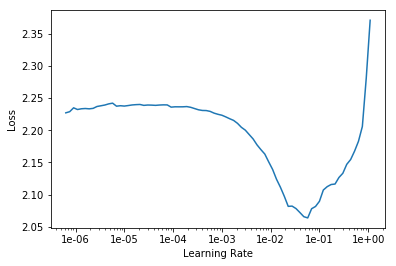

In [16]:
learn.recorder.plot()

In [17]:
# lr = 1e-2
# moms = (0.7,0.8)
# scale = (1**4)
# cycles = 20
lr = 1e-2
moms = (0.7,0.8)
scale = (1**4)
cycles = 20

In [18]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.673834,1.364529,0.552778,00:13
1,1.370826,1.142930,0.630833,00:13
2,1.314268,1.131315,0.630556,00:14
3,1.512866,1.249247,0.576389,00:14
4,1.393723,1.183849,0.609167,00:13
5,1.276089,1.133172,0.629444,00:12
6,1.199427,1.099361,0.655833,00:13
7,1.097036,1.052165,0.664722,00:14
8,1.196258,1.038486,0.669722,00:12
9,1.082212,1.059886,0.670278,00:13


In [19]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.768037,1.002460,0.698889,00:13
1,0.772703,1.005473,0.695556,00:13
2,0.816099,1.029122,0.696667,00:14
3,0.865122,0.987772,0.698611,00:13
4,0.882758,1.015718,0.690278,00:13
5,0.914896,1.029776,0.690278,00:14
6,0.908415,0.976388,0.699167,00:12
7,0.870432,1.011525,0.694167,00:13
8,0.865504,1.021011,0.695556,00:13
9,0.845392,1.011761,0.697222,00:14


In [20]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.590527,1.090141,0.703889,00:13
1,0.603216,1.088254,0.706111,00:13
2,0.634155,1.090154,0.703611,00:12
3,0.683408,1.100006,0.702222,00:14
4,0.717303,1.066090,0.693889,00:13
5,0.775787,1.045997,0.698333,00:14
6,0.768379,1.061563,0.698889,00:14
7,0.761997,1.045723,0.703611,00:14
8,0.722673,1.084102,0.697778,00:12
9,0.704453,1.045970,0.703333,00:13


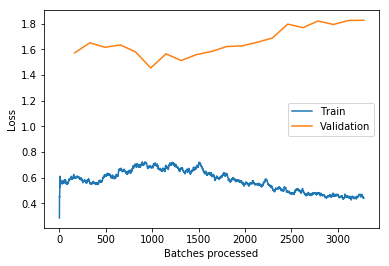

In [16]:
learn.recorder.plot_losses()

In [21]:
learn.save('2020_04_28_use_name_ff_ind')

In [340]:
learn.freeze_to(-2)

In [341]:
learn.fit_one_cycle(cycles, slice((lr/2)/scale,(lr/2)), moms=moms)
#learn.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.2,0.1))

epoch,train_loss,valid_loss,accuracy,time
0,1.302489,1.210643,0.608889,00:11
1,1.147067,1.205897,0.625079,00:11
2,1.043286,1.198088,0.634921,00:12
3,0.959284,1.212335,0.638730,00:11
4,0.937127,1.237250,0.638095,00:11


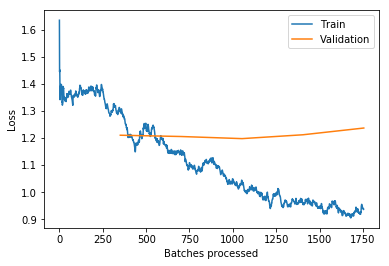

In [342]:
learn.recorder.plot_losses()

In [343]:
learn.freeze_to(-3)
#learn.fit_one_cycle(5, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.2, 0.1))
learn.fit_one_cycle(cycles, slice((lr/10)/scale,(lr/10)), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.895113,1.222485,0.637778,00:17
1,0.889085,1.226429,0.636825,00:18
2,0.881259,1.236015,0.634286,00:20
3,0.881231,1.257907,0.636190,00:17
4,0.855727,1.272891,0.634286,00:18


In [25]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(5e-5 / (2.6 ** 4), 5e-5), moms=(0.2, 0.1))

In [22]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [23]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

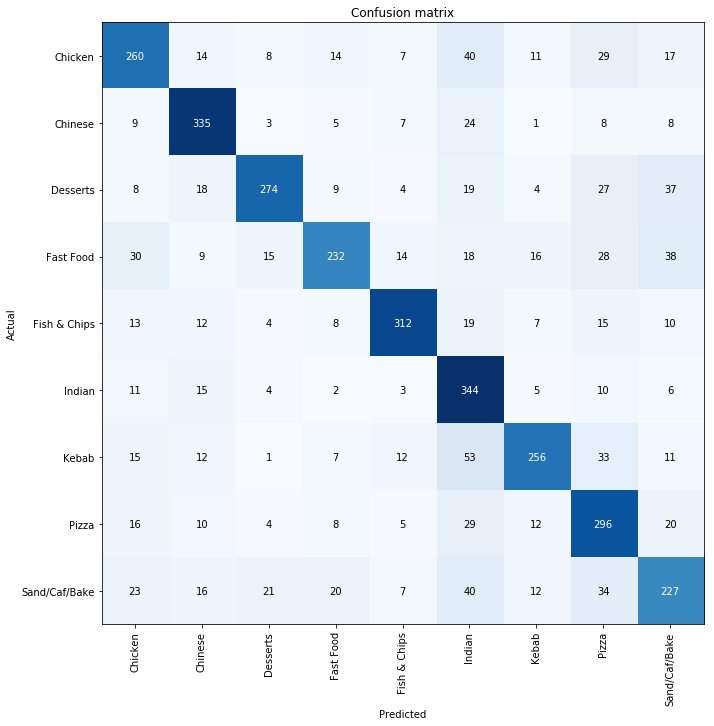

In [24]:
interp.plot_confusion_matrix(figsize=(10,10))

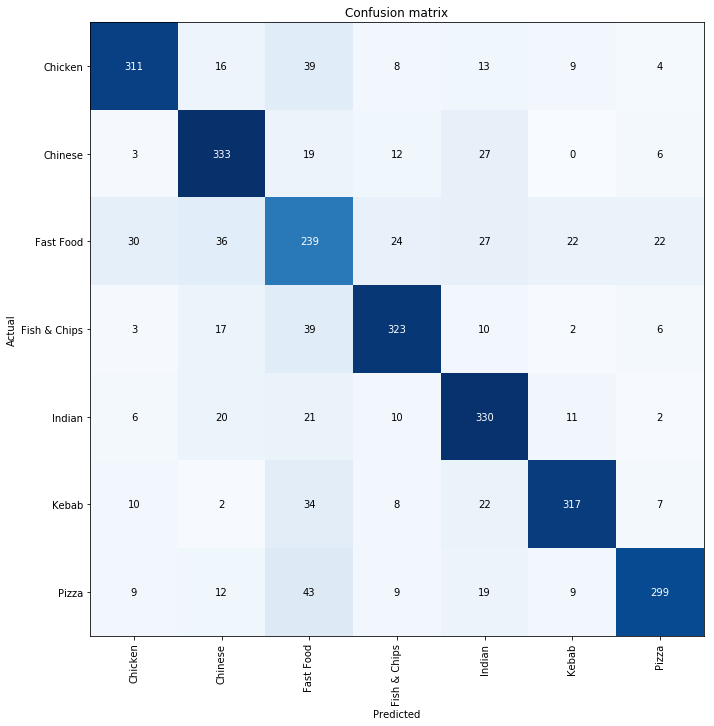

In [158]:
interp.plot_confusion_matrix(figsize=(10,10))

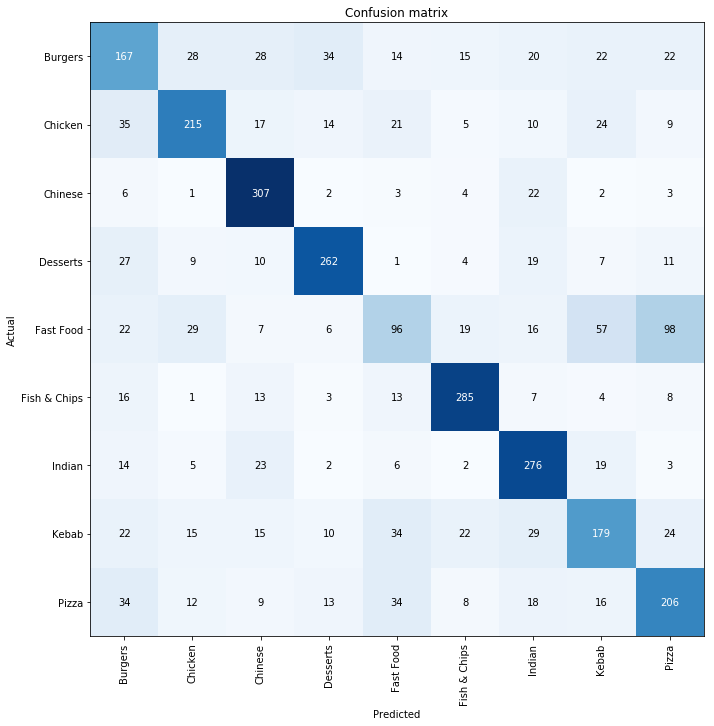

In [350]:
interp.plot_confusion_matrix(figsize=(10,10))

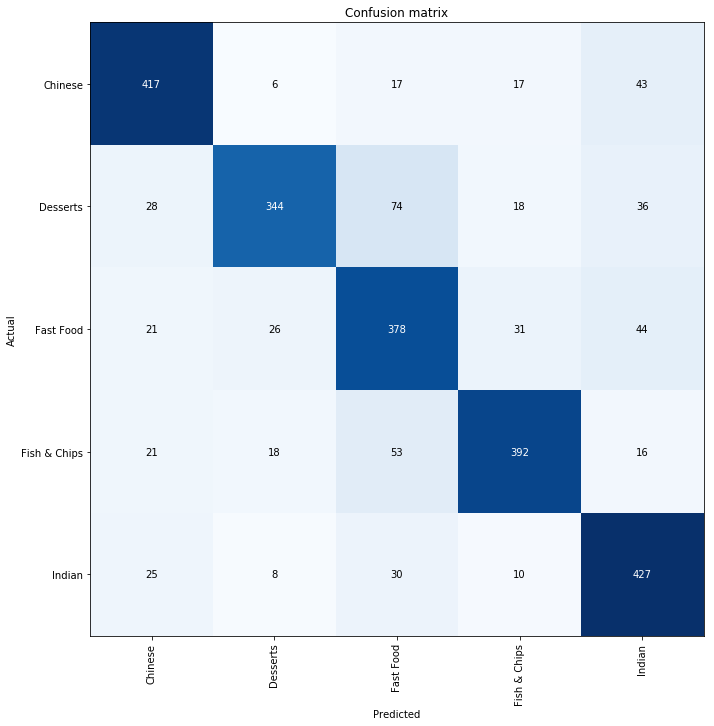

In [27]:
interp.plot_confusion_matrix(figsize=(10,10))

In [35]:
#txt_ci = TextClassificationInterpretation.from_learner(learn)
interp2 = TextClassificationInterpretation(learn, *learn.get_preds(with_loss=True, ordered=True))

In [36]:
#txt_ci.show_top_losses(20)
blah = interp2.show_top_losses(10000)


Text,Prediction,Actual,Loss,Probability
xxbos d o l c e,Fish & Chips,Desserts,13.64,0.00
xxbos m a m a s,Fast Food,Desserts,13.42,0.00
xxbos y u m m y t u m m y,Chinese,Sand/Caf/Bake,13.08,0.00
xxbos k i n g k o n e,Chinese,Desserts,13.03,0.00
xxbos m a m m a m i a ' s,Fast Food,Desserts,12.94,0.00
xxbos m o e ' s p e r i p e r i g r i l l,Fast Food,Desserts,12.85,0.00
xxbos m o n o l o s,Fast Food,Desserts,12.30,0.00
xxbos s u g a r l u m p,Desserts,Sand/Caf/Bake,12.10,0.00
xxbos n u t t y e l l a,Fast Food,Desserts,11.98,0.00
xxbos p e r i t t o ' s p e r i p e r i,Fast Food,Desserts,11.88,0.00


In [16]:
interp2.

TextClasDataBunch;

Train: LabelList (45000 items)
x: TextList
xxbos   s o u t h e r n   f r i e d   c h i c k e n     a n d     p i z z a,xxbos   m a h a r a n i   i n d i a n   c u i s i n e,xxbos   s w e e t   j a m r o c k,xxbos   s w e e t   j a m r o c k,xxbos   z a a f r a n
y: CategoryList
Fast Food,Indian,Fast Food,Fast Food,Indian
Path: .;

Valid: LabelList (3600 items)
x: TextList
xxbos   j     a n d     d   k e b a b,xxbos   v a r i e t y s   t a k e a w a y,xxbos   h o t   e x p r e s s,xxbos   f a m i l y   k e b a b     a n d     p i z z a r i a,xxbos   s u r f     a n d     t u r f
y: CategoryList
Kebab,Fast Food,Kebab,Fast Food,Fast Food
Path: .;

Test: None

In [37]:
my_top_losses = interp2.top_losses()
my_ds = interp2.data.dl('Valid').dataset
my_classes = interp2.data.valid_ds.classes
my_preds_class = interp2.pred_class
tl_val,tl_idx = my_top_losses


items = []
for idx in tl_idx:
    tx,cl = interp2.data.valid_ds[idx]
    cl = cl.data
    txt =  ' '.join([''.join(i.split()) for i in re.split(r' {2,}',tx.text)])[6:]
    tmp = [txt, f'{my_classes[my_preds_class[idx]]}', f'{my_classes[cl]}']
    items.append(tmp)
items = np.array(items)
names = ['Text', 'Prediction', 'Actual']
df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)}, columns=names)

In [167]:
df.to_csv('13_01_2020_errors.csv', index=False)

In [39]:
cm = interp2.confusion_matrix()

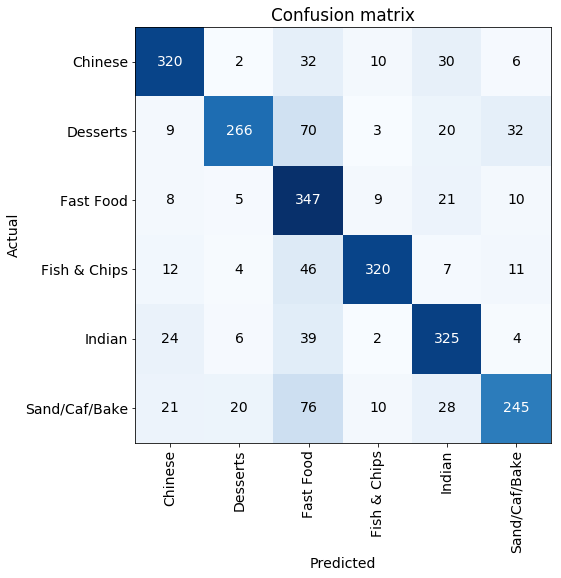

In [40]:
plt.rcParams.update({'font.size': 14})
interp2.plot_confusion_matrix(figsize=(8,8))

In [41]:
#Precision = tp / tp + fp
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [42]:
recall

array([0.8   , 0.665 , 0.8675, 0.8   , 0.8125, 0.6125])

In [43]:
precision

array([0.812183, 0.877888, 0.568852, 0.903955, 0.75406 , 0.795455])

In [44]:
precision.mean()

0.7853987769087402

In [45]:
recall.mean()

0.7595833333333334

In [23]:
learn.predict("mamoods mirch")

(Category Desserts,
 tensor(2),
 tensor([0.1397, 0.0117, 0.3502, 0.1343, 0.0332, 0.0265, 0.0559, 0.1784, 0.0701]))

In [24]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([3.3629e-07, 1.2309e-03, 3.5925e-06, 8.1342e-04, 9.9777e-01, 9.5526e-05,
         4.4523e-06, 3.9081e-05, 4.0542e-05]))

In [25]:
learn.predict("jade garden")

(Category Chinese,
 tensor(1),
 tensor([2.3990e-07, 9.9865e-01, 2.2686e-07, 2.7119e-04, 5.1614e-05, 9.7042e-04,
         1.6681e-06, 3.7176e-05, 1.4342e-05]))

In [22]:
learn.predict("jerk house")

(Category Fast Food,
 tensor(2),
 tensor([0.2168, 0.0406, 0.6402, 0.0161, 0.0781, 0.0083]))

In [23]:
learn.predict("abra kebabra")

(Category Fast Food,
 tensor(2),
 tensor([2.4363e-05, 9.9402e-07, 9.9972e-01, 2.5463e-07, 2.4918e-04, 2.0597e-07]))

In [24]:
learn.predict("mcdoner")

(Category Fast Food,
 tensor(2),
 tensor([3.2807e-03, 5.0873e-04, 9.7921e-01, 6.8078e-03, 9.9109e-03, 2.7945e-04]))

In [25]:
learn.predict("southern fried rooster")

(Category Fast Food,
 tensor(2),
 tensor([1.2324e-02, 4.9889e-04, 9.6919e-01, 4.4617e-03, 1.1890e-02, 1.6323e-03]))

In [26]:
learn.predict("luigis pizza parlour")

(Category Fast Food,
 tensor(2),
 tensor([1.8512e-04, 1.0966e-05, 9.9935e-01, 4.0324e-05, 3.8692e-04, 2.2607e-05]))

In [27]:
learn.predict("mrs boggins sandwich shop")

(Category Sand/Caf/Bake,
 tensor(5),
 tensor([1.2056e-05, 4.1230e-05, 2.2578e-04, 1.1115e-05, 3.0048e-06, 9.9971e-01]))

In [28]:
learn.predict("codfather")

(Category Fish & Chips,
 tensor(3),
 tensor([5.8303e-05, 7.2931e-06, 5.3680e-03, 9.9445e-01, 4.3550e-05, 7.2614e-05]))

In [29]:
learn.predict("top chef")

(Category Chinese,
 tensor(0),
 tensor([7.6555e-01, 1.6182e-03, 1.3469e-01, 5.7949e-03, 9.1621e-02, 7.2157e-04]))

In [30]:
learn.predict("doner cha want me")

(Category Indian,
 tensor(4),
 tensor([0.1948, 0.0015, 0.3805, 0.0207, 0.3818, 0.0207]))

In [31]:
learn.predict("kebabs r us")

(Category Fast Food,
 tensor(2),
 tensor([3.2910e-05, 6.0077e-08, 9.9990e-01, 9.7345e-08, 6.6743e-05, 2.0561e-07]))

In [32]:
learn.predict("sapna")

(Category Indian,
 tensor(4),
 tensor([2.1046e-02, 7.7136e-05, 2.6818e-01, 1.6395e-03, 7.0792e-01, 1.1401e-03]))

In [33]:
learn.predict("cocum")

(Category Indian,
 tensor(4),
 tensor([1.2241e-02, 2.1769e-04, 9.6867e-02, 6.4483e-04, 8.8962e-01, 4.1378e-04]))

In [34]:
learn.predict("uncle sam")

(Category Fast Food,
 tensor(2),
 tensor([0.0388, 0.1145, 0.4139, 0.1552, 0.2734, 0.0042]))